# Optimisation - CSCM72 - Coursework 1 - Developing an Optimiser


**Created by Dafydd-Rhys Maund (2003900)**

This codes purpose is to try and optimise the weight of a compression spring with 3 variables that determin the weight.

1. x1 = diameter of the wire
2. x2 = mean dimater of coil
3. x3 = number of active coils

therefore vector has 3 components

- x = (x1, x2, x3)⊤ ∈ X

The feasible space X is defined by four constaints and bounds on x.

**Problem:**

- min x∈X f(x) = x1^2 x2(2 + x3)

'min' specifies the problem is looking for minimisation

**Feasible Space X:**

1. **Constraints**

- g1(x) = 1 − (x2^3 x2 / 71785 x1^4) ≤ 0,
- g2(x) = (4 x2^2 - x1 x2 / 12566(x2 x1^3 - x1^4)) + (1 / 5108 x1^2) - 1 ≤ 0,
- g3(x) = 1 - ((140.45 x1) / (x2^2 x3)) ≤ 0,
- g4(x) = (x1 + x2 / 1.5) - 1 ≤ 0.

2. **Bounds**

- x1 ∈ [0.05, 2] ⊂ R,
- x2 ∈ [0.25, 1.3] ⊂ R,
- x3 ∈ [2, 15] ⊂ N.

This solution implements Random Search and Simulated Annealing to return approximations of the optimal solution.

Each algorithm is run 21 times each for 500 iterations.

Results are analysed and visualised to provide overview of results

## Imports


Importing the libraries needed

In [1808]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Functions (Task 1)


This section capulates all parts of task 1.

1. Implement f(x) and gi(x); ∀i ∈ [1, 4] ⊂ N functions independently
2. Each function takes Numpy array x
3. Each function has independent counter representing how many times its been called
4. Make a check to ensure its within the feasible space.

### Problem (Task 1.1)

#### Counters (Task 1.1.1)

Counters made for each individual function, will be called within function to increment each time it is used in an iteration.

In [1809]:
f_counter = 0
g1_counter = 0
g2_counter = 0
g3_counter = 0
g4_counter = 0

#### Problem Defined (Task 1.1.2)

This is the problem defined in the paper converted into code.

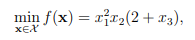

In [1810]:
def f(x):
    global f_counter
    f_counter += 1
    x1, x2, x3 = x
    return x1**2 * x2 * (2 + x3)

### Feasible Space (Task 1.2)

#### Functions (Task 1.2.1)

This represents the feasible space for x. Defined by four constraints and bounds, these are the four constraints taken from the paper and implemented into code.

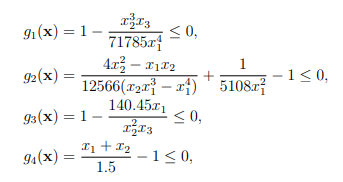

Also includes each independent counter and Cunpy array x outlined in task 1.

In [1811]:
def g1(x):
    global g1_counter
    g1_counter += 1
    x1, x2, x3 = x
    return 1 - (x2**3 * x3) / (71785 * x1**4)

In [1812]:
def g2(x):
    global g2_counter
    g2_counter += 1
    x1, x2, x3 = x
    return ((4 * x2**2) - x1 * x2) / (12566 * (x2 * x1**3 - x1**4)) + (1 / (5108 * x1**2)) - 1

In [1813]:
def g3(x):
    global g3_counter
    g3_counter += 1
    x1, x2, x3 = x
    return 1 - (140.45 * x1) / (x2**2 * x3)

In [1814]:
def g4(x):
    global g4_counter
    g4_counter += 1
    x1, x2, x3 = x
    return (x1 + x2) / 1.5 - 1

#### Bounds  (Task 1.2.2)

Represents the bounds defined for the feasible space.

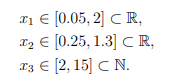

⊂ R represents subsets of REAL numbers

⊂ N represents subsets of NATURAL numbers


In [1815]:
x1_bounds = (0.05, 2.0)
x2_bounds = (0.25, 1.3)
x3_bounds = (2, 15)

#### Feasibility Check (Task 1.2.3)

Feasibility check to ensure that **x** is within the feasibility space

In [1816]:
def is_feasible(x):
    x1, x2, x3 = x

    if not (x1_bounds[0] <= x1 <= x1_bounds[1]):
        return False
    if not (x2_bounds[0] <= x2 <= x2_bounds[1]):
        return False
    if not (x3_bounds[0] <= x3 <= x3_bounds[1]):
        return False

    return all([g1(x) <= 0, g2(x) <= 0, g3(x) <= 0, g4(x) <= 0])

## Functions' Validation (Task 1 - Continued)

This is the validation required within the document to be implemented.

**My code returns all the CORRECT and EXPECTED outputs**

In [1817]:
x = np.array([0.42, 0.9, 7])

print(f"f(x): {f(x)}")
print(f"g1(x): {g1(x)}")
print(f"g2(x): {g2(x)}")
print(f"g3(x): {g3(x)}")
print(f"g4(x): {g4(x)}")

f(x): 1.4288399999999999
g1(x): 0.9977154813805641
g2(x): -0.9924857111736846
g3(x): -9.403703703703702
g4(x): -0.12


## Random Search (Task 2)

This is Random Search method implementation onto the computation problem. This uses a modified version of the maximation algorithm found in the lecture slides (converted for minimisation).

- Seed functionality has been added so results can be more consistent and better for comparing results.
- is_feasible function also added to ensure it fits within the feasible space

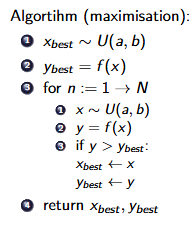

In [1818]:
def random_search(iterations, seed):
    global f_counter, g1_counter, g2_counter, g3_counter, g4_counter

    if seed is not None:
        np.random.seed(seed)

    best_x = None
    best_y = float('inf')

    for _ in range(iterations):
        x = np.array([
            np.random.uniform(*x1_bounds),
            np.random.uniform(*x2_bounds),
            np.random.randint(*x3_bounds)
        ])

        if f_counter >= iterations or g1_counter >= iterations or g2_counter >= iterations or g3_counter >= iterations or g4_counter >= iterations:
          break

        if is_feasible(x):
            y = f(x)

            if f_counter >= iterations or g1_counter >= iterations or g2_counter >= iterations or g3_counter >= iterations or g4_counter >= iterations:
              break

            # minimisation ('<')
            if y < best_y:
                best_x = x
                best_y = y

    if best_x is None:
        return None, None

    return best_x, best_y

## Simulated Annealing (Task 3)

This is Simulated Annealing method implementation onto the computation problem. This was heavily inspired by the implementation shown in the lecture notes.

- This implementation can introduce many models incl. logarithmic, exponential and Fast.
- Initial temperture is used logarithmic and fast, Decay is specifically for the exponential model.
- Seed functionality has been added so results can be more consistent and better for comparing results.
- is_feasible function also added to ensure it fits within the feasible space

**Models**

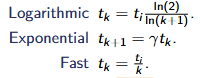

**Algorithm**

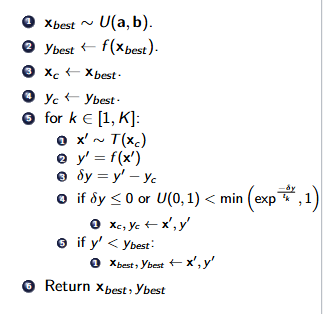

In [1819]:
import numpy as np

def simulated_annealing(iterations, initial_temperature, decay, model, seed):
    global f_counter, g1_counter, g2_counter, g3_counter, g4_counter

    if seed is not None:
        np.random.seed(seed)

    best_x = None
    best_y = float('inf')

    xc = np.array([
        np.random.uniform(*x1_bounds),
        np.random.uniform(*x2_bounds),
        np.random.randint(*x3_bounds)
    ])
    yc = f(xc)

    temperature = initial_temperature

    for k in range(1, iterations + 1):
        x = np.array([
            np.clip(np.random.normal(xc[0], 0.1), *x1_bounds),
            np.clip(np.random.normal(xc[1], 0.1), *x2_bounds),
            np.clip(np.random.randint(xc[2] - 1, xc[2] + 1), *x3_bounds)
        ])

        if f_counter >= iterations or g1_counter >= iterations or g2_counter >= iterations or g3_counter >= iterations or g4_counter >= iterations:
          break

        if is_feasible(x):
            y = f(x)
            dy = y - yc

            if f_counter >= iterations or g1_counter >= iterations or g2_counter >= iterations or g3_counter >= iterations or g4_counter >= iterations:
              break

            if dy <= 0 or np.random.uniform(0, 1) < np.min([np.exp(-dy / temperature), 1]):
                xc, yc = x, y

            if y < best_y:
                best_x, best_y = x, y

            if model == 'ln':
                temperature = initial_temperature * (np.log(2) / np.log(k + 1))  # Logarithmic decay
            elif model == 'exp':
                temperature *= decay  # Exponential decay
            elif model == 'fast':
                temperature = initial_temperature / k  # Fast decay

    if best_x is None:
        return None, None

    return best_x, best_y


## Optimisers' Evaluation (Task 4)

### Gather Results (Task 4.1)

Code to reset counters before every run, ensures the msot updated values are in place, making sure no more than 500 evaluations take place.

In [1820]:
def reset():
    global f_counter, g1_counter, g2_counter, g3_counter, g4_counter
    f_counter, g1_counter, g2_counter, g3_counter, g4_counter = 0, 0, 0, 0, 0

This code simply runs the code with all set parameters

- repititions: amount of times the optimiser will be ran
- iterations: how many times the functions will be evaluated
- temp: initial temperture for the models of simulated annealing
- decay: decay imposed on exponential model
- model: model used for simulated annealing
- seed: seed used for repeatable results

In [1821]:
def run_experiments(repetitions, iterations, temp, decay, model, seed):
    rs_results = []
    sa_results = []

    for rep in range(repetitions):
        reset()
        rs_x, rs_y = random_search(iterations, seed + rep if seed else None)
        if rs_x is None:
            continue
        rs_results.append(rs_y)

        reset()
        sa_x, sa_y = simulated_annealing(iterations, temp, decay, model, seed + 2 * rep if seed else None)
        if sa_x is None:
            continue
        sa_results.append(sa_y)

    return rs_results, sa_results

### Output results (Task 4.2)

This outputs the results, these results vary based on the parameters given to the algorithm.

- As mentioned in the CW, repitions and iterations are set. Although 500 iterations is unlikely as there are more than 1 evaluation per iteration in some cases.
- Model values such as temp, decay and model can be changed. For this example im using the exponential model with temp 100 and decay 0.99 which can be changed.
- Seed is set to 43 which changed to a different number or None, the reason its not set to None by default is because **'You must ensure that all the results are pre-generated and repeatable'**.

**Results**:

Based on current parameters in place.

- Random Search in nearly all cases yields more results Simulated Annealing (in this case 21 to 4)
- Simulated Annealing may have issues finding values related to the constraints being to strict or convergence.
- Although Simulated Annealing gets less values, the solutions it gathers is alot better than Random Search. As you can see from the results the mean is far smaller.

> Random Search: Mean = 0.031480735004048785, Standard Deviation = 0.012416819321559431

> Simulated Annealing: Mean = 0.024766874854350203, Standard Deviation = 0.0018264494832286877

- There are outliers in Random Search highlighting its lack of focus towards the most effecient solution.

- Looking at the t-test result acquired
  - t-statistic = 1.035: size difference between mean of both datasets relative to variation

  - p-value = 0.311: probability of observing a difference equally or more extreme than the one measured

  - Conclusion: Since the p-value (0.311) is greater than 0.05, there is no statistically significant difference between the performance of Random Search (rs) and Simulated Annealing (sa) in the case of this problem.



Length: 21 - Random Search: [0.030108277566706726, 0.019422980400902425, 0.025193360467863846, 0.02378236633138312, 0.0290142146244793, 0.03393251602147834, 0.03617906473543163, 0.05038312305866654, 0.07277687206966321, 0.031198935561020803, 0.024959327206001736, 0.01719518184392856, 0.03324386002117268, 0.03305976951638724, 0.02222275155972015, 0.01931336457579624, 0.03983200784620317, 0.0282826968023384, 0.03282547187720025, 0.01652455873796867, 0.04164473426071152] 
Length: 4 - Simulated Annealing: [0.027003626727959328, 0.022516428594142154, 0.023493876397413883, 0.026053567697885437] 

Random Search: Mean = 0.031480735004048785, Standard Deviation = 0.012416819321559431
Simulated Annealing: Mean = 0.024766874854350203, Standard Deviation = 0.0018264494832286877 



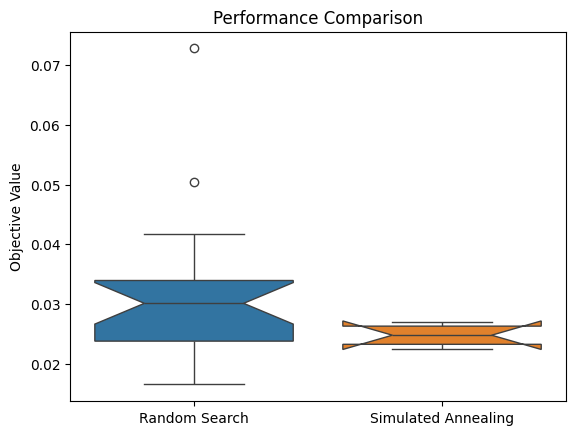


T-test result: t-statistic = 1.03512487738242, p-value = 0.3113721579746629


In [1829]:
repetitions = 21
iterations = 500
temp = 10
decay = 0.99
model = 'exp' # 'ln' (logarithmic), 'exp' (exponential), 'fast' (fast)
seed = 42

rs, sa = run_experiments(repetitions, iterations, temp, decay, model, seed)

print(f"Length: {len(rs)} - Random Search: {rs} \nLength: {len(sa)} - Simulated Annealing: {sa} \n")

if len(rs) != 0:
    rs_mean = np.mean(rs)
    rs_std = np.std(rs)

if len(sa) != 0:
    sa_mean = np.mean(sa)
    sa_std = np.std(sa)

print(f"Random Search: Mean = {rs_mean}, Standard Deviation = {rs_std}\nSimulated Annealing: Mean = {sa_mean}, Standard Deviation = {sa_std} \n")

data = [rs, sa]
sns.boxplot(data=data, notch=True)
plt.xticks([0, 1], ['Random Search', 'Simulated Annealing'])
plt.ylabel('Objective Value')
plt.title('Performance Comparison')
plt.show()

t_stat, p_value = stats.ttest_ind(rs, sa)
print(f"\nT-test result: t-statistic = {t_stat}, p-value = {p_value}") # below 0.05 is significant difference